In [41]:
import matplotlib.pyplot as plt
%pylab inline
import numpy as np
from halotools.empirical_models import Zheng07
import plotting
plotting.prettyplot()

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
model = Zheng07(threshold=-21)

In [6]:
theta = np.loadtxt("/home/mj/public_html/nbar_clustering_vmean_theta_t34.dat")
w = np.loadtxt("/home/mj/public_html/nbar_clustering_vmean_w_t34.dat")

In [7]:
print np.median(theta , axis = 0)

[ 10.71553381   0.29952621  12.77252365   1.16461836  13.95046059]


In [8]:
print np.mean(theta , axis = 0)

[ 10.76121457   0.29598472  12.77682818   1.16222177  13.94899457]


In [68]:
#samples[:, 2] = np.exp(samples[:, 2])
m_mcmc= map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                             zip(*np.percentile(theta, [16, 50, 84],
                                                axis=0)))
print m_mcmc

[(10.715533806538041, 1.1114059132878751, 1.0380237934037737), (0.29952620811084901, 0.10422626864640799, 0.11224293310456612), (12.772523650428226, 0.038039194022310596, 0.027314241815544094), (1.1646183597630662, 0.041520245118929155, 0.043857606450020015), (13.950460585925045, 0.014529622144086929, 0.016011445320957662)]


In [10]:
prior_dict = {

    'logM0'  : {'shape': 'uniform', 'min': 9.  ,  'max': 15.},
    'sigma_logM': {'shape': 'uniform', 'min': 0. ,  'max': 1.},
    'logMmin': {'shape': 'uniform', 'min': 12.5,  'max': 13.09},
    'alpha': {'shape': 'uniform', 'min': .9 ,  'max': 1.45},
    'logM1'  : {'shape': 'uniform', 'min': 13.6  ,  'max': 14.25},
}

"""Plot range"""

plot_range = []
for key in ['logM0', 'sigma_logM', 'logMmin','alpha','logM1']:
        plot_range.append([prior_dict[key]['min'], prior_dict[key]['max']])
prior_range = np.array(plot_range)




In [11]:
np.percentile(theta, [16, 50, 84],axis=0)

array([[  9.67751001,   0.18728328,  12.74520941,   1.12076075,
         13.93444914],
       [ 10.71553381,   0.29952621,  12.77252365,   1.16461836,
         13.95046059],
       [ 11.82693972,   0.40375248,  12.81056284,   1.2061386 ,
         13.96499021]])

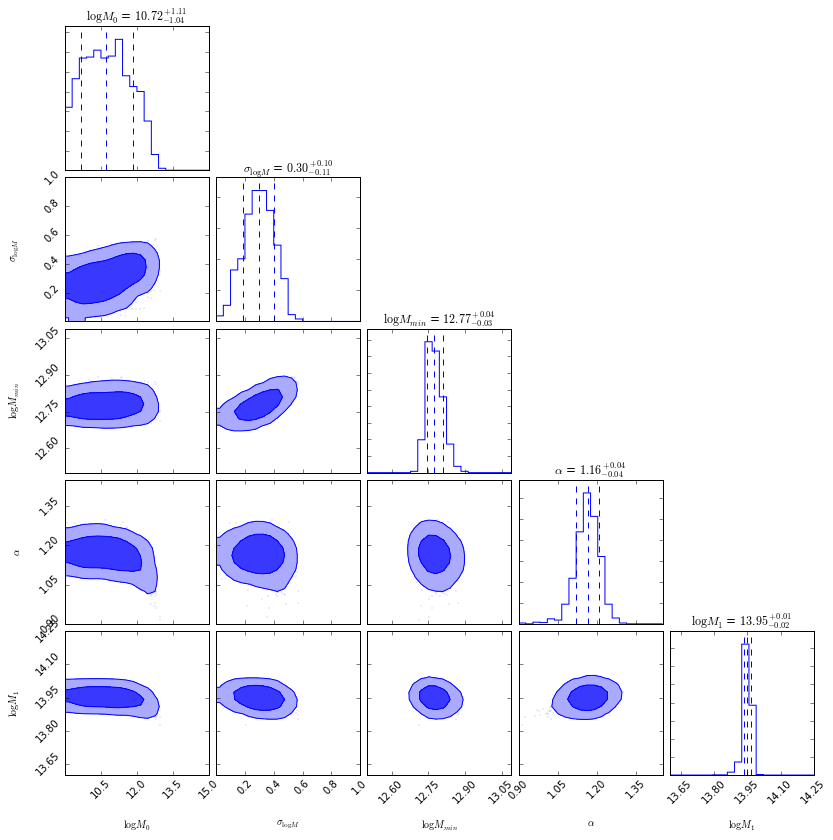

In [12]:
import corner
corner.corner(theta, labels=[r'$\logM_{0}$',r'$\sigma_{\logM}$',r'$\logM_{min}$',r'$\alpha$',r'$\logM_{1}$'],
                range=plot_range , quantiles=[0.16,0.5,0.84],
                show_titles=True, title_args={"fontsize": 12},
                plot_datapoints=True, fill_contours=True, levels=[0.68, 0.95], 
                color='b', bins=20, smooth=1.0)
plt.savefig("/home/mj/public_html/infered_hod.png")

{'logM0': 11.92, 'sigma_logM': 0.39, 'logMmin': 12.79, 'alpha': 1.15, 'logM1': 13.94}


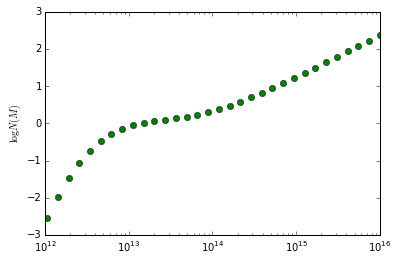

In [14]:
m = np.logspace(11,16, 40)
#print m
from scipy.special import erf

def mean_central(M , model):
    logMmin = model.param_dict["logMmin"]
    sigma = model.param_dict["sigma_logM"]
    return .5 * (1. + erf((np.log10(M) - logMmin)/(sigma)))
def mean_satelite(M , model):
    ncen  = mean_central(M , model)
    M0 = 10. ** model.param_dict["logM0"]
    M1 = 10. ** model.param_dict["logM1"]
    alpha = model.param_dict["alpha"]
    return ncen * ((M - M0)/(M1)) ** alpha
input_hod = np.log10(mean_central(m, model) + mean_satelite(m , model))
#pylab.loglog(m , mean_central(m) , "ro" , alpha = .1 , lw = 4.)
#pylab.loglog(m , mean_satelite(m) , "bo" , alpha = .1 , lw = 4.)
pylab.semilogx(m , np.log10(mean_central(m, model) + mean_satelite(m , model)) , "go" , alpha = 1.)
pylab.ylabel(r"$\log N(M)$")
#pylab.ylim((10**-6))
print model.param_dict

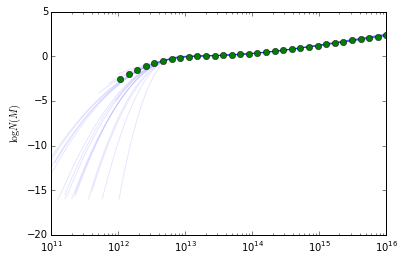

In [86]:
X = np.logspace(11,16, 100)
for i in (np.random.rand(20)*len(theta)).astype(int):
    #print theta[i]
    mod = Zheng07(threshold = -21)
    #print mod.param_dict['logM0']
    mod.param_dict["logM0"] = theta[i][0]
    mod.param_dict["sigma_logM"] = theta[i][1]
    mod.param_dict["logMmin"] = theta[i][2]
    mod.param_dict["alpha"] = theta[i][3]
    mod.param_dict["logM1"] = theta[i][4]
    #mod.param_dict = theta[i]
    #mod.param_dict["logM0"] , mod.param_dict["sigma_logM"] , mod.param_dict["logMmin"],mod.param_dict["alpha"] , mod.param_dict["logM1"]= theta[i][0],theta[i][1],theta[i][2],theta[i][3],theta[i][4] 
    output_hod = np.log10(mean_central(X, mod) + mean_satelite(X , mod))
    pylab.semilogx(X , output_hod , "b-" , alpha = .1)
    
    pylab.ylabel(r"$\log N(M)$")
pylab.semilogx(m , input_hod , "go" , alpha = 1.)

In [19]:
m = Zheng07()
m.populate_mock()
rr = m.compute_galaxy_clustering()[0]
xir = np.loadtxt("xir_Mr20.dat")
xir_cov = np.loadtxt("clustering_covariance_Mr20.dat")

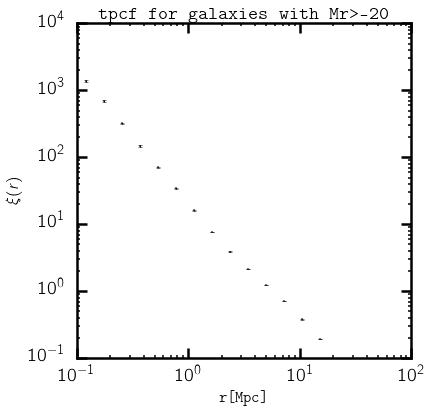

In [40]:

pylab.figure(figsize(6,6))
pylab.errorbar(rr , xir , yerr = np.diag(xir_cov)**.5 , fmt="ok", ms=1,
            capsize=2, alpha=1.)

pylab.yscale("log")
pylab.xscale("log")
pylab.xlabel("r[Mpc]")
pylab.ylabel("$\\xi (r)$")
pylab.title("tpcf for galaxies with Mr>-20")

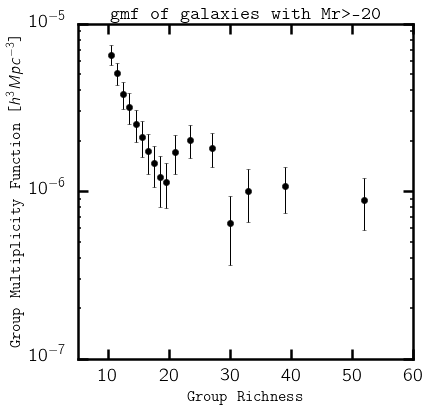

In [48]:
sdss_bins = np.array([10,11,12,13,14,15,16,17,18,19,20,22,25,29,31,35,43,61])
sdss_mean = np.loadtxt("gmf_Mr20.dat")
sdss_bins = np.loadtxt("gmf_bins_Mr20.dat")
sdss_noise = np.loadtxt("gmf_noise_Mr20.dat")
plt.figure(figsize(6,6))
plt.errorbar(0.5*(sdss_bins[:-1]+sdss_bins[1:]) , sdss_mean, yerr = sdss_noise
             ,fmt="ok", capsize=2.0)

plt.ylabel(r"Group Multiplicity Function [$h^{3}Mpc^{-3}$]")
plt.xlabel("Group Richness")
#plt.xscale("log")
plt.yscale("log")
plt.xlim((5,60))
plt.title("gmf of galaxies with Mr>-20")

In [51]:
theta_group = np.loadtxt("/home/mj/public_html/nbar_gmf_Mr20_theta_t10.dat")
w_group = np.loadtxt("/home/mj/public_html/nbar_gmf_Mr20_w_t10.dat")

theta_cl = np.loadtxt("/home/mj/public_html/nbar_clustering_Mr20_theta_t19.dat")
w_cl = np.loadtxt("/home/mj/public_html/nbar_clustering_Mr20_w_t19.dat")

In [34]:
import abcpmc
data_hod = np.array([11.38 , 0.26 , 12.02 , 1.06 , 13.31])


"""Prior"""

prior = abcpmc.TophatPrior([10.,.1,11.02,.8,13.],[13.,.5,13.02,1.3,14.])
prior_dict = {

    'logM0'  : {'shape': 'uniform', 'min': 10.  ,  'max': 13.},
    'sigma_logM': {'shape': 'uniform', 'min': .1 ,  'max': .5},
    'logMmin': {'shape': 'uniform', 'min': 11.02,  'max': 13.02},
    'alpha': {'shape': 'uniform', 'min': .8 ,  'max': 1.3},
    'logM1'  : {'shape': 'uniform', 'min': 13.  ,  'max': 14.},
}

"""Plot range"""

plot_range = []
for key in ['logM0', 'sigma_logM', 'logMmin','alpha','logM1']:
        plot_range.append([prior_dict[key]['min'], prior_dict[key]['max']])
prior_range = np.array(plot_range)

In [5]:
THETA_group = []
for i in range(20):
    THETA_group.append(np.loadtxt("/home/mj/public_html/nbar_clustering_Mr20_theta_t"+str(i)+".dat"))
THETA_group = np.array(THETA_group)

In [6]:
print THETA_group.shape

(20, 1000, 5)


In [11]:
merrs = []
for i in xrange(20):
    merrs.append(map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                             zip(*np.percentile(THETA_group[i], [16, 50, 84],
                                                axis=0))))

In [12]:
print merrs[10]

[(11.318981625384165, 0.72589534253460286, 0.72664819108406675), (0.29379933043354584, 0.12617811264501988, 0.1161297120027571), (12.035970578385566, 0.047815613487152575, 0.03581337076994906), (1.0415576106371849, 0.051235854272375425, 0.058684855749036258), (13.294888013170482, 0.039108836779311318, 0.051489686858753103)]


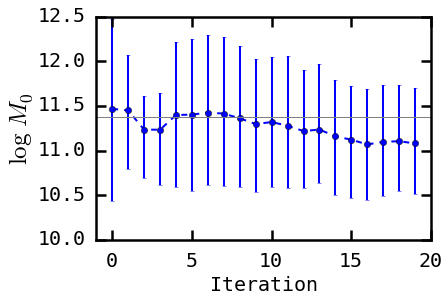

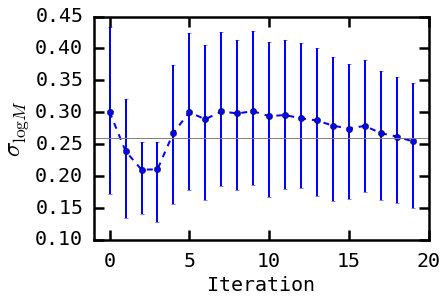

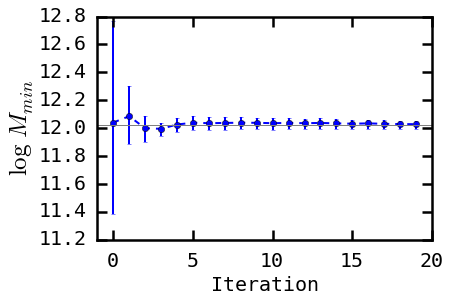

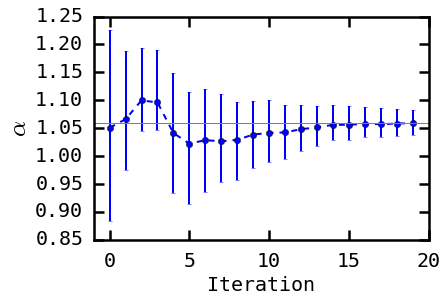

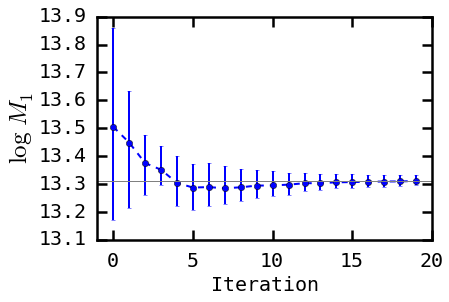

In [40]:
x = np.arange(20)
merrs = np.array(merrs)

x = np.arange(20)
labels=['$\log \ M_{0}$',r'$\sigma_{\logM}$',r'$\log \ M_{min}$',r'$\alpha$',r'$\log \ M_{1}$']

for i in range(5):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    xlabel = ax.set_xlabel('Iteration', fontsize=20)
    ylabel = ax.set_ylabel(labels[i], fontsize=25)
    #title = ax.set_title(r'$M_{\ast} > 10^{10.5} M_{\odot}$', fontsize=25)

    ax.errorbar(x, merrs[:,i][:,0], yerr=[merrs[:,i][:,1], merrs[:,i][:,2]], 
                fmt='--o' , capsize = 2, color='blue', linewidth=2)


    ax.plot(np.linspace(-1, 20, 100), np.ones(100)*data_hod[i]  , color='gray')

    #plt.xscale('log')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlim(xmin = -1, xmax=20)
    #plt.ylim(ymin = -0.5, ymax = 1)

    fig.savefig('/home/mj/public_html/convergence'+str(i)+'.pdf', 
                bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight')

In [50]:
model = Zheng07()
npts = 1e3
mass = np.logspace(11, 14, npts)
input_hod_satelite = model.mean_occupation_satellites(prim_haloprop = mass)
input_hod_centrals = model.mean_occupation_centrals(prim_haloprop = mass)

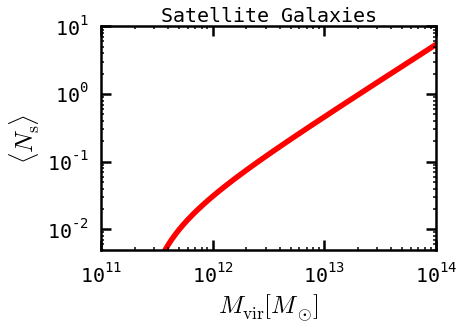

In [76]:
fig2_sats = plt.figure()
ax = fig2_sats.add_subplot(111)
xlabel = ax.set_xlabel(r'$M_{\rm vir} [M_{\odot}]$', fontsize=25)
ylabel = ax.set_ylabel(r'$\langle N_{\rm s}\rangle$', fontsize=25)
title = ax.set_title('Satellite Galaxies', fontsize=20)
ax.plot(mass, input_hod_satelite, color='red', linewidth=5.5)
index = np.random.choice(range(len(theta_cl)), 100, p = w_cl/np.sum(w_cl))
#print index
for i in index:
    mod = Zheng07()
    mod.param_dict["logM0"] = theta_cl[i][0]
    mod.param_dict["sigma_logM"] = theta_cl[i][1]
    mod.param_dict["logMmin"] = theta_cl[i][2]
    mod.param_dict["alpha"] = theta_cl[i][3]
    mod.param_dict["logM1"] = theta_cl[i][4]
    #mod.populate_mock()
    output_hod_satellites = mod.mean_occupation_satellites(prim_haloprop = mass)
    ax.plot(mass, output_hod_satellites, color='blue', linewidth=.00005)
    
plt.loglog()
plt.xlim(xmin=1e11, xmax=1e14)
plt.ylim(ymin=5e-3, ymax=10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig2_sats.savefig('/home/mj/public_html/convergence_satellites.pdf', 
                bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight')

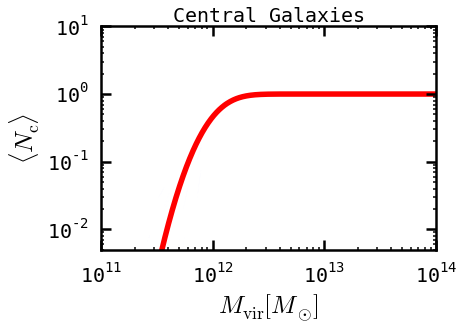

In [75]:
fig2_cents = plt.figure()
ax = fig2_cents.add_subplot(111)
xlabel = ax.set_xlabel(r'$M_{\rm vir} [M_{\odot}]$', fontsize=25)
ylabel = ax.set_ylabel(r'$\langle N_{\rm c}\rangle$', fontsize=25)
title = ax.set_title('Central Galaxies', fontsize=20)
ax.plot(mass, input_hod_centrals, color='red', linewidth=5.5)
index = np.random.choice(range(len(theta_cl)), 100, p = w_cl/np.sum(w_cl))
for i in index:
    mod = Zheng07()
    mod.param_dict["logM0"] = theta_cl[i][0]
    mod.param_dict["sigma_logM"] = theta_cl[i][1]
    mod.param_dict["logMmin"] = theta_cl[i][2]
    mod.param_dict["alpha"] = theta_cl[i][3]
    mod.param_dict["logM1"] = theta_cl[i][4]
    #mod.populate_mock()
    output_hod_centrals = mod.mean_occupation_centrals(prim_haloprop = mass)
    ax.plot(mass, output_hod_centrals, color='blue', linewidth=.00005)
    
plt.loglog()
plt.xlim(xmin=1e11, xmax=1e14)
plt.ylim(ymin=5e-3, ymax=10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig2_cents.savefig('/home/mj/public_html/convergence_centrals.pdf', 
                bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight')

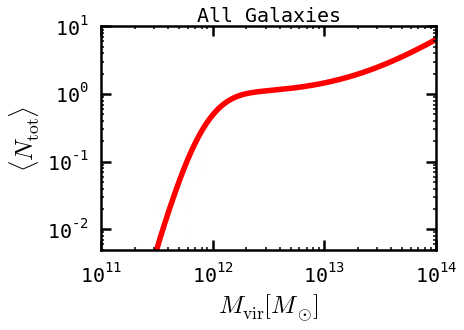

In [78]:
fig3 = plt.figure()
ax = fig3.add_subplot(111)
xlabel = ax.set_xlabel(r'$M_{\rm vir} [M_{\odot}]$', fontsize=25)
ylabel = ax.set_ylabel(r'$\langle N_{\rm tot}\rangle$', fontsize=25)
title = ax.set_title('All Galaxies', fontsize=20)
ax.plot(mass, input_hod_centrals + input_hod_satelite, color='red', linewidth=5.5)
index = np.random.choice(range(len(theta_cl)), 100, p = w_cl/np.sum(w_cl))
for i in index:
    mod = Zheng07()
    mod.param_dict["logM0"] = theta_cl[i][0]
    mod.param_dict["sigma_logM"] = theta_cl[i][1]
    mod.param_dict["logMmin"] = theta_cl[i][2]
    mod.param_dict["alpha"] = theta_cl[i][3]
    mod.param_dict["logM1"] = theta_cl[i][4]
    #mod.populate_mock()
    output_hod = mod.mean_occupation_centrals(prim_haloprop = mass)+ mod.mean_occupation_satellites(prim_haloprop = mass)
    ax.plot(mass, output_hod, color='blue', linewidth=.00005)
    
plt.loglog()
plt.xlim(xmin=1e11, xmax=1e14)
plt.ylim(ymin=5e-3, ymax=10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig3.savefig('/home/mj/public_html/convergence_allgals.pdf', 
                bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight')